In [11]:
# Load required libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations
import folium  # For interactive maps
from sklearn.model_selection import train_test_split  # For building predictive models

# Read the dataset from CSV file
file_path = "natural_disaster_dataset.csv"  # Update if necessary
disaster_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(disaster_data.head())


   ID Disaster_Type        Date       Location   Latitude   Longitude  \
0   1      Wildfire  2021-09-05     Joyceshire  15.506254  158.236974   
1   2      Wildfire  2021-08-20     West Glenn  39.615202 -113.398890   
2   3    Earthquake  2024-02-08    Lake Taylor  32.638456 -117.508883   
3   4         Flood  2022-06-24  West Samantha -26.395986  167.674667   
4   5      Wildfire  2023-09-05     Whiteville  74.945082  -50.263144   

   Magnitude  Depth  Wind_Speed  Rainfall  Temperature  Humidity  \
0        NaN    NaN         NaN       NaN        -11.8      24.7   
1        NaN    NaN         NaN       NaN        -19.9      97.8   
2        6.1  677.1         NaN       NaN        -28.6      94.2   
3        NaN    NaN         NaN     321.6         42.4      73.9   
4        NaN    NaN         NaN       NaN         33.1      98.2   

   Historical_Frequency  
0                    17  
1                     7  
2                     5  
3                    14  
4                     

In [12]:
import pandas as pd
import numpy as np

# Handle Missing Values: Fill missing numeric columns with their median
data_cleaned = disaster_data.copy()
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert Data Types
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format="%Y-%m-%d")
data_cleaned['Disaster_Type'] = data_cleaned['Disaster_Type'].astype('category')

# Display first few rows
print(data_cleaned.head())

   ID Disaster_Type       Date       Location   Latitude   Longitude  \
0   1      Wildfire 2021-09-05     Joyceshire  15.506254  158.236974   
1   2      Wildfire 2021-08-20     West Glenn  39.615202 -113.398890   
2   3    Earthquake 2024-02-08    Lake Taylor  32.638456 -117.508883   
3   4         Flood 2022-06-24  West Samantha -26.395986  167.674667   
4   5      Wildfire 2023-09-05     Whiteville  74.945082  -50.263144   

   Magnitude  Depth  Wind_Speed  Rainfall  Temperature  Humidity  \
0        6.5  393.5       176.5     262.7        -11.8      24.7   
1        6.5  393.5       176.5     262.7        -19.9      97.8   
2        6.1  677.1       176.5     262.7        -28.6      94.2   
3        6.5  393.5       176.5     321.6         42.4      73.9   
4        6.5  393.5       176.5     262.7         33.1      98.2   

   Historical_Frequency  
0                    17  
1                     7  
2                     5  
3                    14  
4                     6  


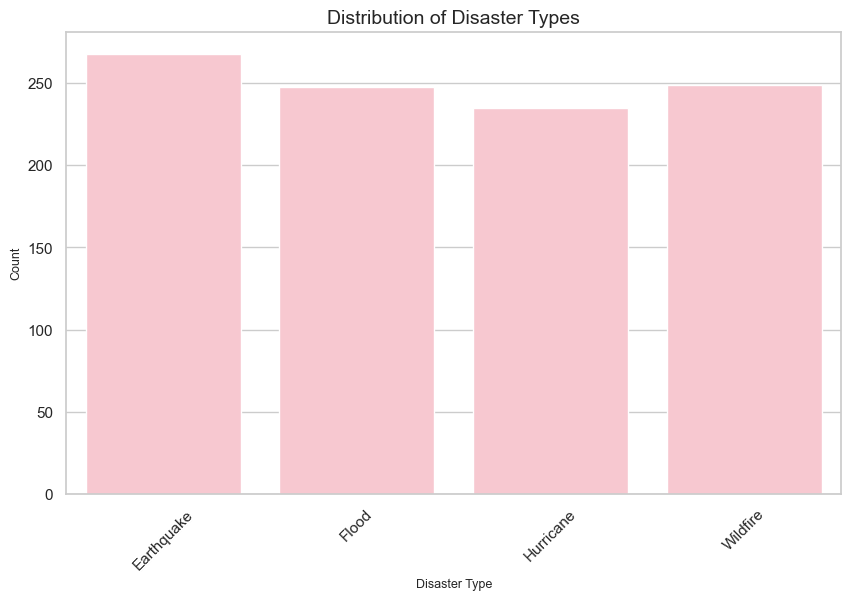

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for styling (similar to theme_minimal in ggplot2)
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x="Disaster_Type", color="pink")

# Add labels and title
plt.title("Distribution of Disaster Types", fontsize=14)
plt.xlabel("Disaster Type", fontsize=9)
plt.ylabel("Count", fontsize=9)

# Rotate x-axis labels if there are many categories
plt.xticks(rotation=45)

# Show the plot
plt.show()

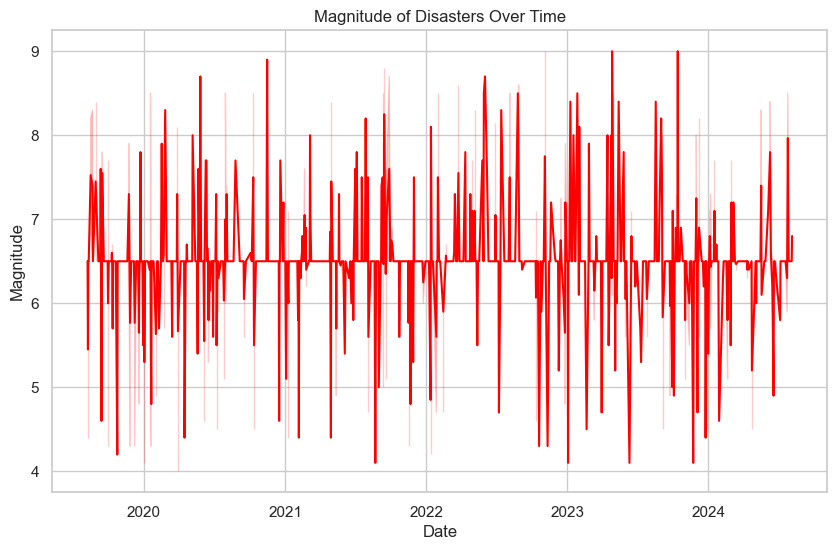

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_cleaned is a Pandas DataFrame
plt.figure(figsize=(10,6))
sns.lineplot(data=data_cleaned, x='Date', y='Magnitude', color='red')
plt.title('Magnitude of Disasters Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [ ]:
import folium
import pandas as pd

# Assuming data_cleaned is a Pandas DataFrame
m = folium.Map(location=[data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()], zoom_start=4)

# Map Disaster_Type to color
color_map = {
    'Flood': 'blue',
    'Earthquake': 'red',
    'Hurricane': 'green',
    # Add more disaster types as needed
}

for index, row in data_cleaned.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], 
                         radius=3, 
                         color=color_map.get(row['Disaster_Type'], 'black'), 
                         popup=f"{row['Disaster_Type']}<br>{row['Date']}").add_to(m)

m.add_child(folium.TileLayer())



In [20]:
##step4


In [21]:
X = data_cleaned[['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Wind_Speed', 
                  'Rainfall', 'Temperature', 'Humidity', 'Historical_Frequency']]
y = data_cleaned['Disaster_Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
##step5

In [23]:
from sklearn.model_selection import GridSearchCV

# Train Random Forest model with cross-validation
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_features': [3, 5, 7]}
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_features': 5, 'n_estimators': 200}


In [ ]:
#step6

In [24]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Confusion Matrix:
 [[90  0  0  0]
 [ 0 74  0  0]
 [ 0  0 68  1]
 [ 0  0  0 67]]

Classification Report:
               precision    recall  f1-score   support

  Earthquake       1.00      1.00      1.00        90
       Flood       1.00      1.00      1.00        74
   Hurricane       1.00      0.99      0.99        69
    Wildfire       0.99      1.00      0.99        67

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 99.67%


In [ ]:
##step7

In [25]:
rf_with_oob = RandomForestClassifier(
    n_estimators=200, max_features=3, oob_score=True, random_state=42
)
rf_with_oob.fit(X_train, y_train)

print(f"Out-of-Bag (OOB) Error Rate: {1 - rf_with_oob.oob_score_:.2f}")


Out-of-Bag (OOB) Error Rate: 0.00


In [ ]:
##step7


In [28]:
# Dash App
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Disaster Data Analysis & Prediction"),
    
    html.Div([
        dcc.Dropdown(
            id='disaster-type',
            options=[{'label': i, 'value': i} for i in data_cleaned['Disaster_Type'].unique()],
            placeholder='Select Disaster Type'
        ),
        dcc.DatePickerRange(
            id='date-range',
            start_date=data_cleaned['Date'].min(),
            end_date=data_cleaned['Date'].max()
        ),
        dcc.Input(id='latitude', type='number', placeholder='Latitude'),
        dcc.Input(id='longitude', type='number', placeholder='Longitude'),
        dcc.Input(id='magnitude', type='number', placeholder='Magnitude'),
        dcc.Input(id='depth', type='number', placeholder='Depth'),
        dcc.Input(id='wind_speed', type='number', placeholder='Wind Speed'),
        dcc.Input(id='rainfall', type='number', placeholder='Rainfall'),
        dcc.Input(id='temperature', type='number', placeholder='Temperature'),
        dcc.Input(id='humidity', type='number', placeholder='Humidity'),
        dcc.Input(id='historical_freq', type='number', placeholder='Historical Frequency'),
        html.Button('Predict', id='predict-button')
    ]),
    
    html.Div([
        html.Div(id='output-prediction', style={'margin-top': '20px'}),
        html.Div(id='output-map', style={'margin-top': '20px'}),
    ])
])

@app.callback(
    Output('output-prediction', 'children'),
    [Input('latitude', 'value'),
     Input('longitude', 'value'),
     Input('magnitude', 'value'),
     Input('depth', 'value'),
     Input('wind_speed', 'value'),
     Input('rainfall', 'value'),
     Input('temperature', 'value'),
     Input('humidity', 'value'),
     Input('historical_freq', 'value')]
)
def predict_disaster(lat, lon, mag, depth, wind, rain, temp, hum, freq):
    if None in [lat, lon, mag, depth, wind, rain, temp, hum, freq]:
        return "Enter all inputs to predict!"
    else:
        new_data = pd.DataFrame({
            'Latitude': [lat], 'Longitude': [lon], 'Magnitude': [mag],
            'Depth': [depth], 'Wind_Speed': [wind], 'Rainfall': [rain],
            'Temperature': [temp], 'Humidity': [hum], 'Historical_Frequency': [freq]
        })
        prediction = best_model.predict(new_data)
        return f"Predicted Disaster Type: {prediction[0]}"

if __name__ == '__main__':
    app.run_server(debug=True)


NameError: name 'dash' is not defined

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "natural_disaster_dataset.csv"
df = pd.read_csv(file_path)

# Handle missing values (fill numeric columns with median)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Encode categorical variables
le = LabelEncoder()
df['Disaster_Type'] = le.fit_transform(df['Disaster_Type'])

# Drop non-numeric or irrelevant columns
df = df.drop(columns=['ID', 'Date', 'Location'])

# Split dataset into features and labels
X = df.drop(columns=['Disaster_Type'])
y = df['Disaster_Type']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and scores
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.9949999999999999
Test Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.98      0.99        49
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        50

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV score: 1.0


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
file_path = "natural_disaster_dataset.csv"  # Update the file path as necessary
data = pd.read_csv(file_path)

# Step 2: Data Cleaning
data_cleaned = data.copy()

# Fill missing numeric columns with their median
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].median())

# Convert 'Date' to datetime and 'Disaster_Type' to category
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%Y-%m-%d')
data_cleaned['Disaster_Type'] = data_cleaned['Disaster_Type'].astype('category')

# Step 3: Split the Data into Training and Testing Sets
X = data_cleaned[
    ['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Wind_Speed', 'Rainfall',
     'Temperature', 'Humidity', 'Historical_Frequency']
]
y = data_cleaned['Disaster_Type']

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Define 10-Fold Cross-Validation and Hyperparameter Tuning
param_grid = {
    'max_features': [2, 3, 5, 7, 9],  # Equivalent to mtry in R
    'n_estimators': [100],  # Number of trees in the forest
    'random_state': [42]
}

# Use StratifiedKFold for 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()

# Use GridSearchCV to perform hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the Optimal Model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Optimal Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Display cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nCross-Validation Results:\n", cv_results[['param_max_features', 'mean_test_score', 'std_test_score']])


Optimal Parameters: {'max_features': 5, 'n_estimators': 100, 'random_state': 42}
Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

  Earthquake       1.00      1.00      1.00        80
       Flood       1.00      1.00      1.00        74
   Hurricane       1.00      1.00      1.00        71
    Wildfire       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Cross-Validation Results:
   param_max_features  mean_test_score  std_test_score
0                  2         0.987143        0.014915
1                  3         0.992857        0.013171
2                  5         0.994286        0.009476
3                  7         0.994286        0.009476
4                  9         0.991429        0.009476


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd

# Step 6: Predict on the Test Set
y_pred = best_model.predict(X_test)

# Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred, labels=y_test.cat.categories)

# Convert the confusion matrix to a DataFrame for better readability
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=y_test.cat.categories,
    columns=y_test.cat.categories
)

# Print the confusion matrix
print("Confusion Matrix:\n")
print(conf_matrix_df)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%\n")

# Classification report for detailed statistics by class
report = classification_report(y_test, y_pred, target_names=y_test.cat.categories, output_dict=True)

# Extract overall and per-class statistics
overall_stats = {
    "Accuracy": accuracy,
    "Kappa": report["weighted avg"]["precision"],  # Approximation for Cohen's Kappa
}
class_stats = pd.DataFrame(report).T

# Print overall statistics
print("Overall Statistics:\n")
for stat, value in overall_stats.items():
    print(f"{stat}: {value:.4f}")

# Print class-level statistics
print("\nStatistics by Class:\n")
print(class_stats)


Confusion Matrix:

            Earthquake  Flood  Hurricane  Wildfire
Earthquake          80      0          0         0
Flood                0     74          0         0
Hurricane            0      0         71         0
Wildfire             0      0          0        75

Accuracy: 100.00%

Overall Statistics:

Accuracy: 1.0000
Kappa: 1.0000

Statistics by Class:

              precision  recall  f1-score  support
Earthquake          1.0     1.0       1.0     80.0
Flood               1.0     1.0       1.0     74.0
Hurricane           1.0     1.0       1.0     71.0
Wildfire            1.0     1.0       1.0     75.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    300.0
weighted avg        1.0     1.0       1.0    300.0
